In [52]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils

import matplotlib.pyplot as plt

In [8]:
# Fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [16]:
# Loading data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

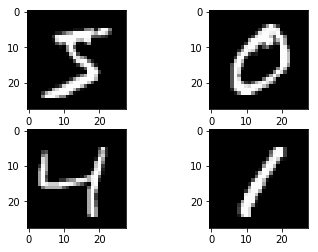

In [12]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [17]:
X_train.shape

(60000, 28, 28)

In [18]:
# flatten the images to a vector
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2]).astype('float32')
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2]).astype('float32')

In [21]:
# normalizing the input values
X_train = X_train / 255
X_test = X_test / 255

In [28]:
# one hot encoding the output values
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [32]:
y_train[1]

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [37]:
num_pixels = X_train.shape[1]
num_classes = y_train.shape[1]

In [40]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    
    # compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [54]:
# build the model
model = baseline_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 5s - loss: 0.2809 - acc: 0.9209 - val_loss: 0.1458 - val_acc: 0.9563
Epoch 2/20
 - 5s - loss: 0.1110 - acc: 0.9682 - val_loss: 0.0949 - val_acc: 0.9693
Epoch 3/20
 - 5s - loss: 0.0701 - acc: 0.9798 - val_loss: 0.0826 - val_acc: 0.9752
Epoch 4/20
 - 5s - loss: 0.0494 - acc: 0.9858 - val_loss: 0.0683 - val_acc: 0.9781
Epoch 5/20
 - 5s - loss: 0.0358 - acc: 0.9899 - val_loss: 0.0667 - val_acc: 0.9793
Epoch 6/20
 - 5s - loss: 0.0265 - acc: 0.9925 - val_loss: 0.0665 - val_acc: 0.9796
Epoch 7/20
 - 5s - loss: 0.0199 - acc: 0.9951 - val_loss: 0.0657 - val_acc: 0.9795
Epoch 8/20
 - 5s - loss: 0.0140 - acc: 0.9967 - val_loss: 0.0581 - val_acc: 0.9827
Epoch 9/20
 - 5s - loss: 0.0104 - acc: 0.9978 - val_loss: 0.0624 - val_acc: 0.9817
Epoch 10/20
 - 5s - loss: 0.0079 - acc: 0.9985 - val_loss: 0.0655 - val_acc: 0.9808
Epoch 11/20
 - 5s - loss: 0.0067 - acc: 0.9989 - val_loss: 0.0652 - val_acc: 0.9817
Epoch 12/20
 - 5s - loss: 0.0053 - 

In [57]:
# evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)

print("Accuracy = %.2f%%" % (scores[1] * 100))

Accuracy = 98.48%
